# Covid-19 Explorations in Mulnomah County, Portland Oregon

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# remove warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
# https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
df = pd.read_csv('time_series_covid19_confirmed_US.csv')

In [3]:
dfm = df[(df.Province_State == 'Oregon') & (df.Admin2 == 'Multnomah')]

In [4]:
dfm.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], axis=1, inplace=True)

In [5]:
# list(dfm)
dfm.head()
# dfm.describe()
# dfm.columns.values.tolist()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21
2316,0,0,0,0,0,0,0,0,0,0,...,32427,32470,32493,32545,32596,32643,32668,32692,32736,32795


In [6]:
# Pandas.melt() unpivots a DataFrame from wide format to long format.
dfm = dfm.melt(var_name ='date', value_name='cases')
dfm.set_index('date', inplace=True)

# Converting the index as date
dfm.index = pd.to_datetime(dfm.index)
# dfm.tail()

In [7]:
dfm['new_cases'] = dfm.diff(axis=0)
dfm['new_cases'] = dfm['new_cases'].fillna(0)
dfm.tail()

,cases,new_cases
date,,
2021-03-20,32643,47.0
2021-03-21,32668,25.0
2021-03-22,32692,24.0
2021-03-23,32736,44.0
2021-03-24,32795,59.0


<AxesSubplot:xlabel='date'>

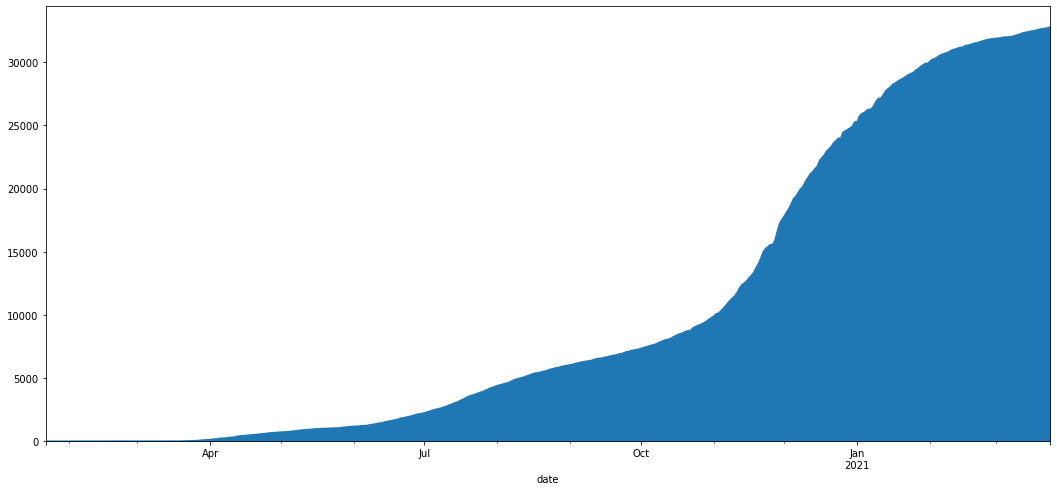

In [7]:
dfm.cases.plot(figsize=(18,8), kind='area')

In [8]:
dfm.new_cases.plot(figsize=(18,8), kind='area')
# dfm.new_cases.plot(figsize=(18,8), kind='bar')

AttributeError: 'DataFrame' object has no attribute 'new_cases'

In [9]:
# dfm.plot()

In [10]:
ax = dfm.plot.area(y=['new_cases', 'cases'])

KeyError: "['new_cases'] not in index"

---
## Goal: 
* #### make a visually appealing plot
* #### have `cases` and `new_cases` overlayed on each other
* #### scale `cases` to match with `new_cases`, indicate this scale in the legend

In [11]:
# dfm['2020-03-11':'2020-04-11']

In [12]:
int((dfm.iloc[61].date - dfm.iloc[0].date) / np.timedelta64(1, 'W'))

AttributeError: 'Series' object has no attribute 'date'

In [13]:
# create column week_number on new_cases
# seaborn histogram
# group by week
dfm['date'] = dfm.index
dfm['date_delta'] = dfm.date.apply(lambda x: x - dfm.iloc[0].date)
dfm['date_week'] = dfm.date.apply(lambda x: x.week)
dfm['date_year'] = dfm.date.apply(lambda x: x.year)
dfm.tail()

,cases,date,date_delta,date_week,date_year
date,,,,,
2021-03-20,32643,2021-03-20,423 days,11,2021
2021-03-21,32668,2021-03-21,424 days,11,2021
2021-03-22,32692,2021-03-22,425 days,12,2021
2021-03-23,32736,2021-03-23,426 days,12,2021
2021-03-24,32795,2021-03-24,427 days,12,2021


In [14]:
# dfm.iloc[1].date - dfm.iloc[0].date

In [15]:
# sns.histplot(data=dfm, x=dfm.date_week, y=dfm.new_cases)

In [16]:
# dfm['2020-03-11':'2020-04-30']
dfm.tail()

,cases,date,date_delta,date_week,date_year
date,,,,,
2021-03-20,32643,2021-03-20,423 days,11,2021
2021-03-21,32668,2021-03-21,424 days,11,2021
2021-03-22,32692,2021-03-22,425 days,12,2021
2021-03-23,32736,2021-03-23,426 days,12,2021
2021-03-24,32795,2021-03-24,427 days,12,2021


In [17]:
plt.figure(figsize=(18,12))
ax = sns.histplot(dfm, x="new_cases", binwidth=1)

ValueError: Could not interpret value `new_cases` for parameter `x`

<Figure size 1296x864 with 0 Axes>

In [18]:
dfm.new_cases.describe()

AttributeError: 'DataFrame' object has no attribute 'new_cases'

In [18]:
dfm.new_cases.sort_values()

date
2020-01-22      0.0
2020-02-27      0.0
2020-02-28      0.0
2020-02-29      0.0
2020-03-01      0.0
              ...  
2021-01-02    464.0
2020-12-26    481.0
2020-11-22    516.0
2020-11-29    655.0
2020-11-28    712.0
Name: new_cases, Length: 428, dtype: float64